# Decision tree for finding the photometric redshift of galaxies as a function of u,r,g,i,z.

In [1]:
import numpy as np
data=np.load("sdss_galaxy_colors.npy")

In [2]:
print(data)

[(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05)
 (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05)
 (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05)
 ...
 (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05)
 (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04)
 (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)]


In [3]:
len(data["u"])

50000

In [4]:
data["redshift"]

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

In [27]:
feat_final=[]
target_final=[]
u_g=[]
r_i=[]
for i in range(len(data["u"])):
    features=[0,0,0,0]
    features[0]=data["u"][i]-data["g"][i]
    features[1]=data["g"][i]-data["r"][i]
    features[2]=data["r"][i]-data["i"][i]
    features[3]=data["i"][i]-data["z"][i]
    feat_final.append(features)
    target_final.append(data["redshift"][i])
    u_g.append(features[0])
    r_i.append(features[2])    

In [28]:
target_final;

In [7]:
import sklearn.tree as skt
dtr=skt.DecisionTreeRegressor(max_depth=3)
dtr.fit(feat_final,target_final)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
predictions=dtr.predict(feat_final)

In [9]:
predictions

array([1.30112401, 0.09436058, 0.09436058, ..., 0.09436058, 1.30112401,
       1.30112401])

In [20]:
diff=[]
for i in range(len(target_final)):
    diff.append(abs(predictions[i]-target_final[i]))
from statistics import median
median(diff)

0.03720734093788352

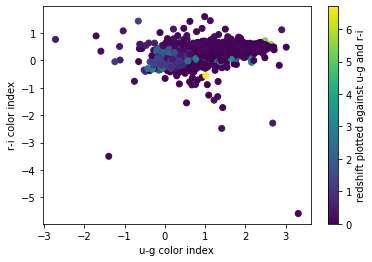

In [32]:
import matplotlib.pyplot as plt
plot=plt.scatter(u_g,r_i,c=target_final)
plt.xlabel("u-g color index")
plt.ylabel("r-i color index")
cb=plt.colorbar(plot)
cb.set_label("redshift plotted against u-g and r-i")
plt.show()